# Ford Gobike Data Exploration
By Nafisah Abdulkadir

Introduction

This documents shows a data exploration of February 2019 fordgobike-tripdata

In [57]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [58]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('C:/Users/nafisah.abdulkadir/OneDrive/Udacity Nanaodegree/Final Project/201902-fordgobike-tripdata.csv')


In [59]:
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type bike_share_for_all_trip  
0            -122.402923     4902    Customer                      No  
1            -122.393170     2535    Customer                      No  
2            -122.404904     5905    Customer                      No  
3            -122.444293     6638  Subscriber                      No  
4            -122.248780     4898  Subscriber                     Yes

In [60]:
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  bike_share_for_all_trip  183412 non-null  object 
dtypes: f

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  
count          183412.000000  183412.000000  
mean             -122.352250    4472.906375  
std                 0.116673    1664.383394  
min              -122.453704      11.000000  
25%              -122.411726    3777.000000  
50%              -122.398279    4958.000000  
75%              -122.288045    5502.000000  
max              -121.874119    6645.000000

In [61]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [62]:
# change the data type for start and end time to be datetime 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [63]:
# convert trip duration to minute
df['duration_min'] = df['duration_sec']/60
df['duration_hour'] = df['duration_sec']/3660

In [64]:
# change the data type for bike_share_for_all_trip to be bool
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [66]:
# convert datatype of user_type to category
df['user_type'] = df['user_type'].astype('category')

In [67]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  bike_share_for_all_trip  \
0            -122.402923     4902    Customer                    False   
1            -122.393170     2535    Customer                    False   
2            -122.404904     5905    Customer                    False   
3            -122.444293     6638  Subscriber                    False   
4            -122.248780     4898  Subscriber                     True   

   duration_min  duration_hour  
0    869.750000      14.258197  
1    708.683333      11.617760  
2   1030.900000      16.900000  
3    608.166667       9.969945  
4     26.416667       0.433060

# What is the structure of your dataset?
This dataset contains 183412 records with 15 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type,duration_min, duration_hour and bike_share_for_all_trip). I recorded 1 boolean, 1 category, 2 datetime, 8 float, 2 integer and 2 object type.

# What is/are the main feature(s) of interest in your dataset?
I am intereted in finding out how the number of trips and trip duration taken is dependent on user type, bike sharing, start station and end station.

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Trip Duration, Start TIme, End Time, User Type, Bike share, stat station and end station

# Univariate Exploration
First of all, i will like to look at the a trend of the trip duration in sec

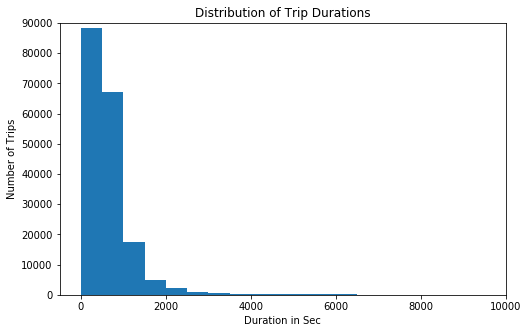

In [68]:
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration in Sec')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

C:\Users\nafisah.abdulkadir\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()


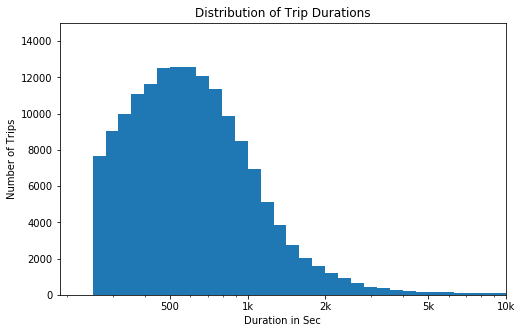

In [69]:
log_binsize = 0.05
bins_log = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins_log)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration in Sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

The trip duration peaked at 600seconds aand it centered on values less than 2000 seconds. The no of trips started close to 8000 and peaked slightly above 12000 trips but we began to see a steady decline after this time.

Next up, i will be checking how the bike ID affects trip duration

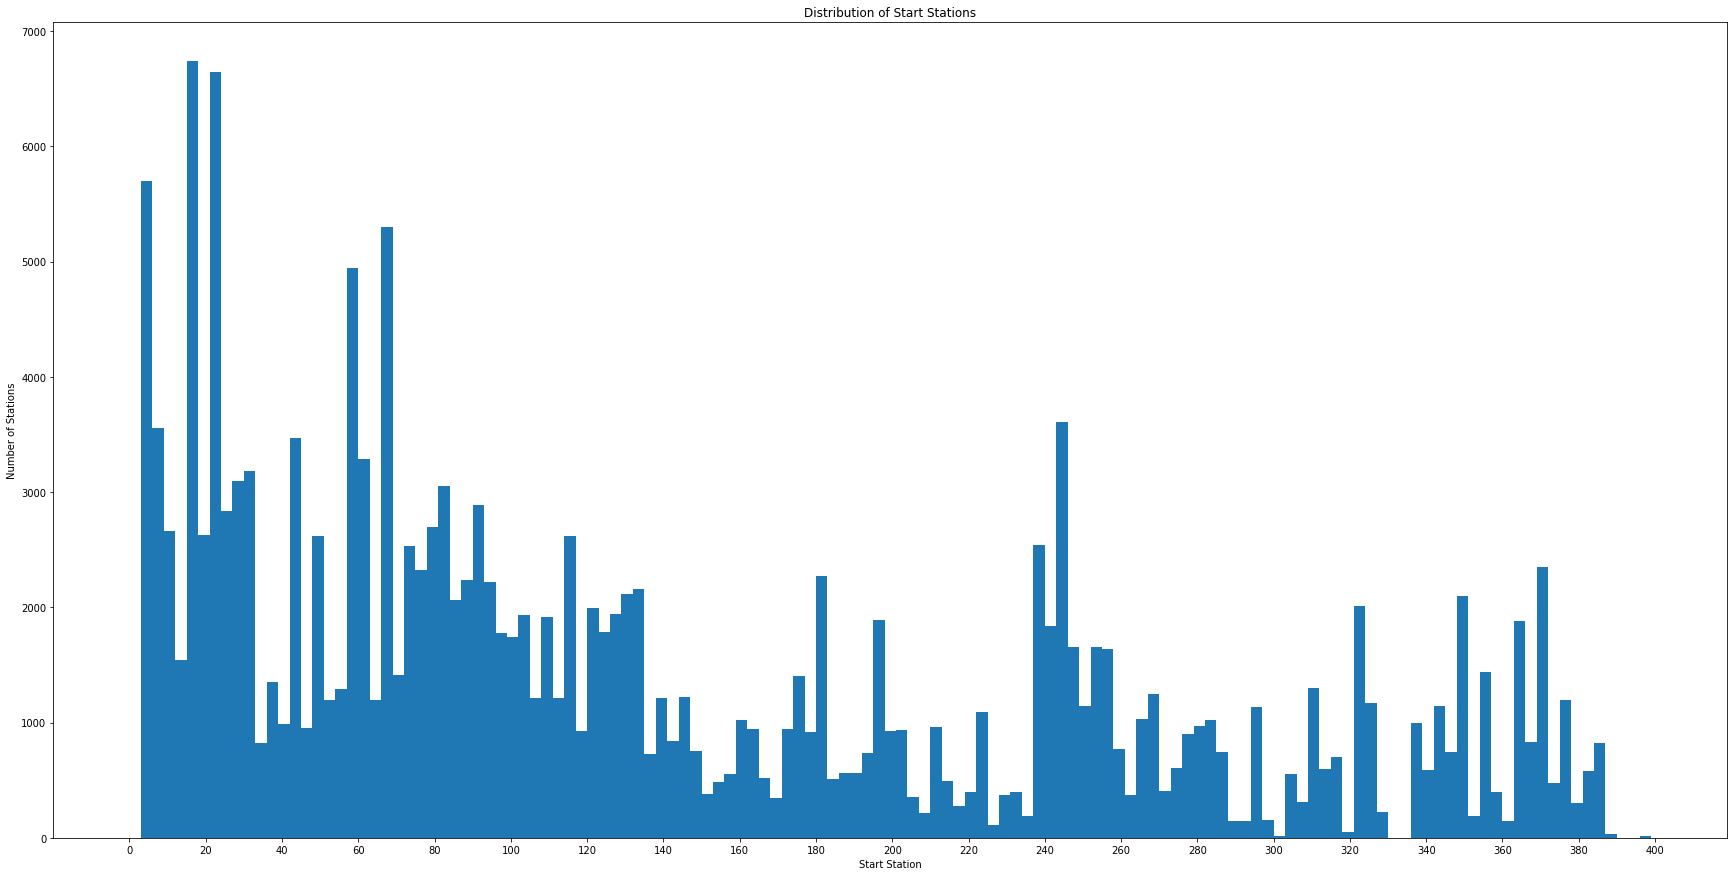

In [70]:
# Plotting start station id distribution on a standard scale
binsize = 3
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[30, 15])
plt.xticks(range(0, 500, 20))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

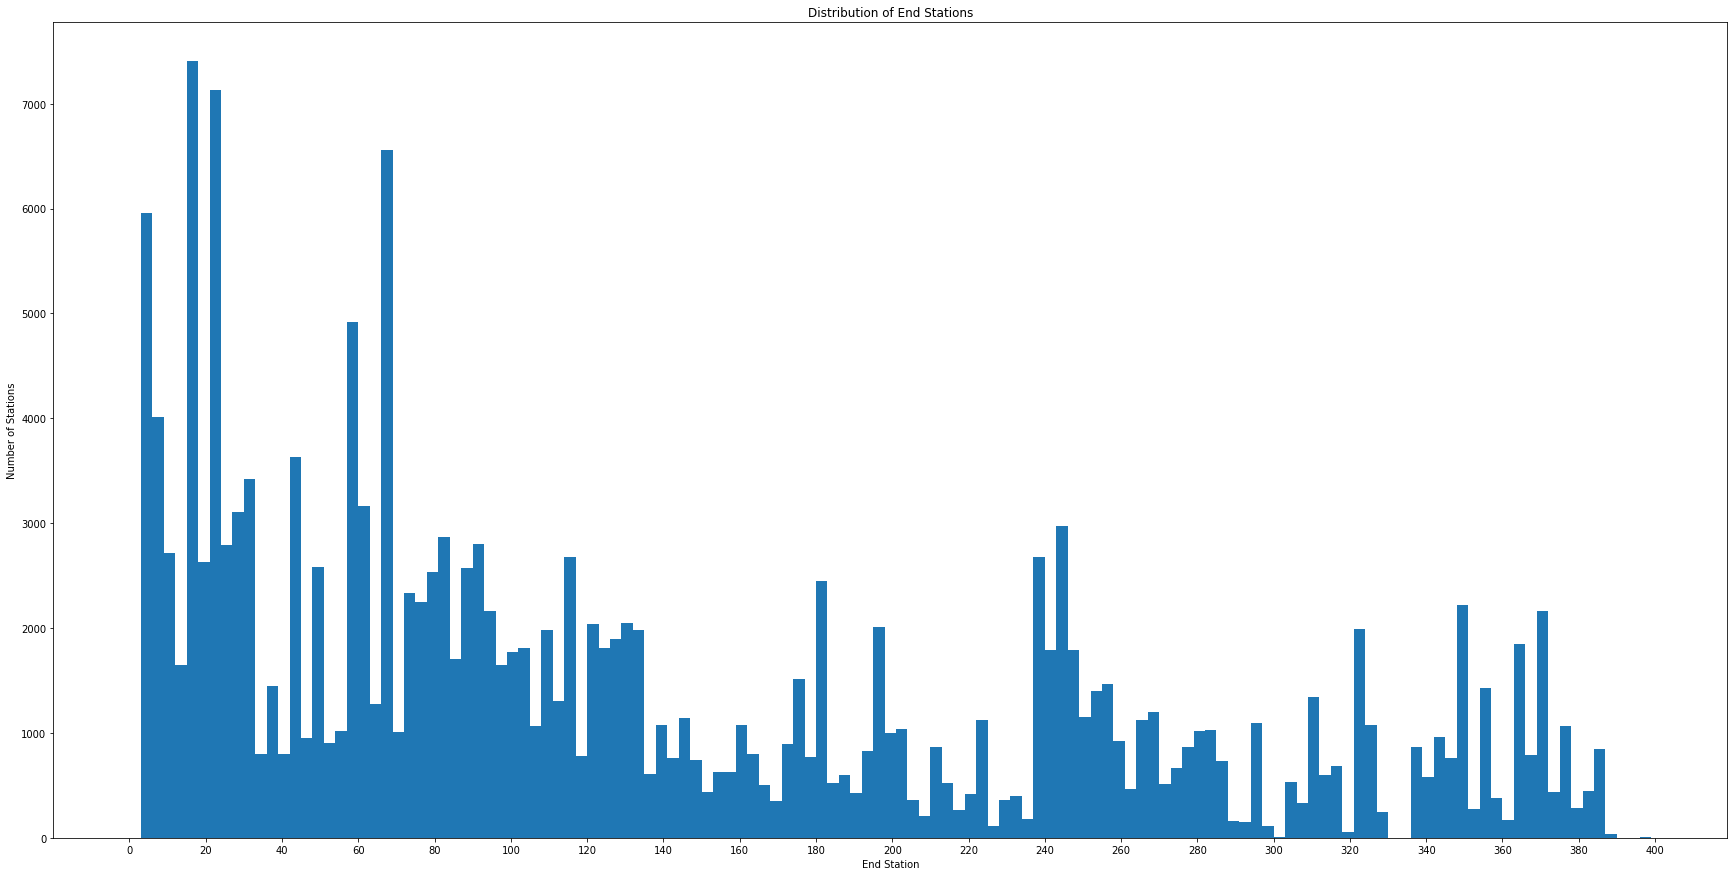

In [71]:
# Plotting start station id distribution on a standard scale
binsize = 3
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[30, 15])
plt.xticks(range(0, 500, 20))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

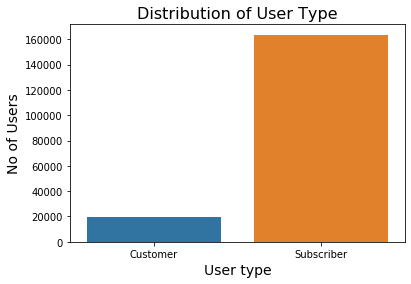

In [72]:
# Let's have a look at the number of users by user type
sb.countplot(data=df, x='user_type')
plt.xlabel('User type', fontsize=14)
plt.ylabel('No of Users', fontsize=14)
plt.title("Distribution of User Type", fontsize=16);

In this chart, we can see that the majority of the users are Subscribers and they have they highest number of trip duration.

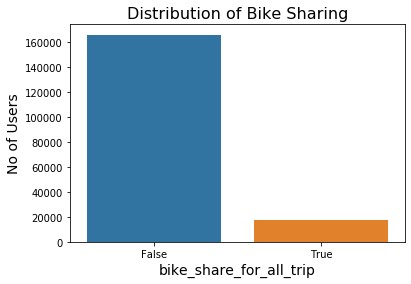

In [73]:
# Let's have a look at the number of users by user type
sb.countplot(data=df, x='bike_share_for_all_trip')
plt.xlabel('bike_share_for_all_trip', fontsize=14)
plt.ylabel('No of Users', fontsize=14)
plt.title("Distribution of Bike Sharing", fontsize=16);

From the chart baove, we can see alot more people did not use the bike sharing.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip duration peaked at 600seconds aand it centered on values less than 2000 seconds. The no of trips started close to 8000 and peaked slightly above 12000 trips but we began to see a steady decline after this time.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I have plotted the start and end stations in a larger plot so we can have a better insight into how these metrics affect productivity at diferent stations.

### Bivariate Exploration

Here, i will combine trip duration trip duration and bike sharing, trip duration and start station and finally trip duration and end station.

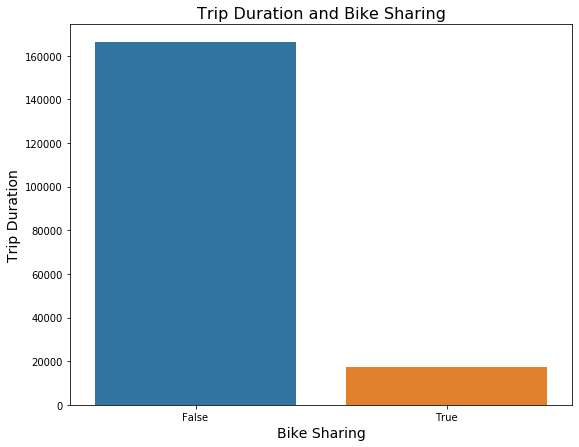

In [93]:
plt.rcParams['figure.figsize'] = 9, 7
sb.countplot(data=df, x='bike_share_for_all_trip');
plt.xlabel('Bike Sharing', fontsize=14)
plt.ylabel('Trip Duration', fontsize=14)
plt.title("Trip Duration and Bike Sharing", fontsize=16);

From the chart above, we can see that only about 20,000 trips were done with bike sharing and over 160,000 trips were done without bike sharing

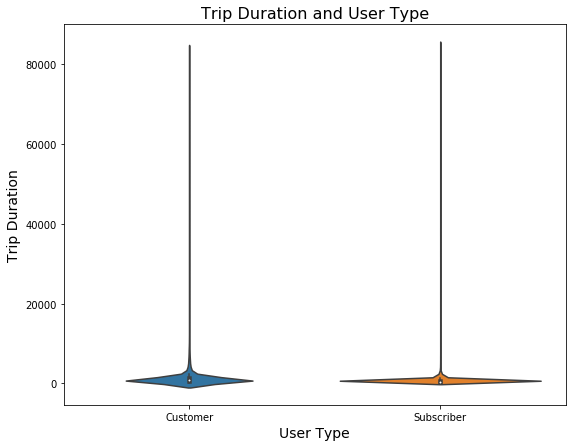

In [75]:
# User Type and Duration
plt.rcParams['figure.figsize'] = 9, 7
sb.violinplot(data=df,x='user_type',y='duration_sec');
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Trip Duration', fontsize=14)
plt.title("Trip Duration and User Type", fontsize=16);

Here, we can see that the a higher number of customers had more trips as compared with subscribers regardless of the fact that we had more number of subscribers than customers.

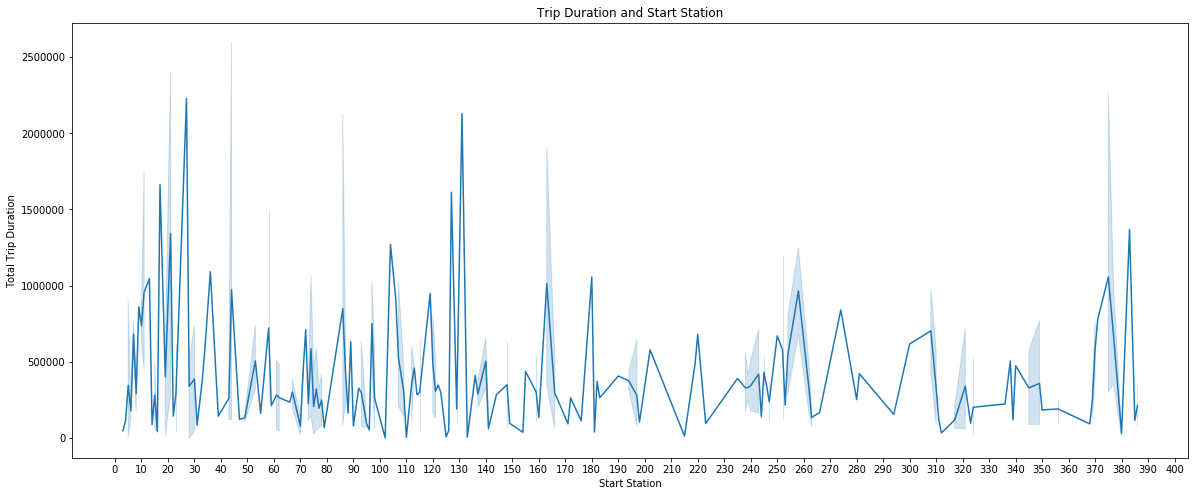

In [76]:
Start = []

all_start_station_ids = sorted(df.start_station_id.unique())
for x in all_start_station_ids :
    Start.append(df[df.start_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(Start)

plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.title('Trip Duration and Start Station')
plt.xlabel('Start Station')
plt.ylabel('Total Trip Duration')
plt.show()

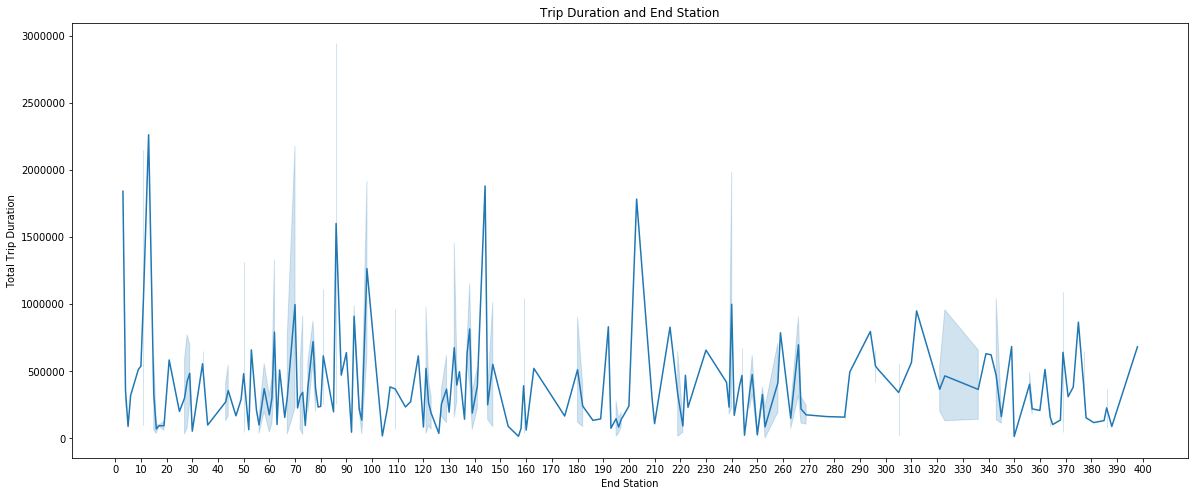

In [77]:
End = []

all_end_station_ids = sorted(df.end_station_id.unique())
for x in all_end_station_ids :
    End.append(df[df.end_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(End)

plt.figure(figsize = [20, 8])
sb.lineplot(x = df['end_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.title('Trip Duration and End Station')
plt.xlabel('End Station')
plt.ylabel('Total Trip Duration')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Trip duration does not depend so much on the start nor end station. We can see that the a higher number of customers had more trips as compared with subscribers regardless of the fact that we had more number of subscribers than customers. Bike sharing does not have so much impact on the trip duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Nil

# Multivariate Exploration¶
The main thing I want to explore in this part of the analysis is how the three categorical measures of bike sharing into the relationship between trip duration and user type

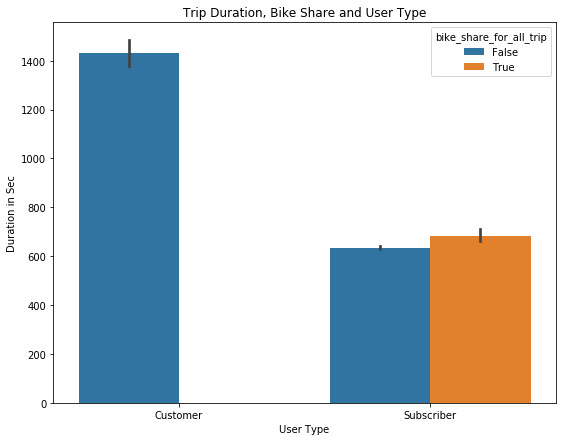

In [90]:
sb.barplot(data=df, x='user_type',y='duration_sec',hue='bike_share_for_all_trip')
plt.title('Trip Duration, Bike Share and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration in Sec')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Here, we can see that no customer had a bike share and they had the highest no of trips in duration compared with subscriber.

### Were there any interesting or surprising interactions between features

NIL